## Problem 3: How far did people travel? (8 points)

During this task, the aim is to calculate the (air-line) distance in meters that each social media user in the data set prepared in *Problem 2* has travelled in-between the posts. We’re interested in the Euclidean distance between subsequent points generated by the same user.

For this, we will need to use the `userid` column of the data set `kruger_posts.shp` that we created in *Problem 2*.

Answer the following questions:
- What was the shortest distance a user travelled between all their posts (in meters)?
- What was the mean distance travelled per user (in meters)?
- What was the maximum distance a user travelled (in meters)?

---


### a) Read the input file and re-project it

- Read the input file `kruger_points.shp` into a geo-data frame `kruger_points`
- Transform the data from WGS84 to an `EPSG:32735` projection (UTM Zone 35S, suitable for South Africa). This CRS has *metres* as units.

In [514]:
# ADD YOUR OWN CODE HERE
import geopandas
import pathlib
import pyproj
import pandas as pd
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH/"data"
fp = DATA_DIRECTORY/"kruger_points.shp"
kruger_points = geopandas.read_file(fp)
#geopandas reads a shapefile into a geopandas dataframe

In [515]:
type(kruger_points)

geopandas.geodataframe.GeoDataFrame

In [516]:
# assign a crs to the geodataframe
kruger_points.to_crs("EPSG:32735",inplace = True)

In [517]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the data
kruger_points.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (952912.890 7229683.258)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (953433.223 7172080.632)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (898955.144 7302197.408)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (956927.218 7243564.942)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (956794.955 7236187.926)


In [518]:
kruger_points.crs

<Derived Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [519]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check that the crs is correct after re-projecting (should be epsg:32735)
import pyproj
assert kruger_points.crs == pyproj.CRS("EPSG:32735")

### b) Group the data by user id

Group the data by `userid` and store the grouped data in a variable `grouped_by_users`

In [520]:
# ADD YOUR OWN CODE HERE

In [521]:
# just to have a look at the unique identifier in the data
kruger_points["userid"].unique()

array([66487960, 65281761, 90916112, ...,   120615, 46410906, 90744213],
      dtype=int64)

In [522]:
grouped_by_users = kruger_points.groupby('userid')


In [523]:
kruger_points.groupby("userid").groups

{16301: [30512, 30535, 30545, 30770, 38232, 38235, 38909, 38911, 38913], 26589: [61781], 29322: [78280], 42181: [8081], 45136: [80613, 81278], 48971: [71512], 50136: [42402, 42439, 42453, 42478, 42526, 42566, 42620, 42670, 42751, 42880], 50530: [79157], 66129: [60285], 74329: [4003], 75914: [60235], 76069: [2388], 88775: [15288, 15289], 88918: [37496, 37879], 90156: [74848, 74852, 75080, 75081, 75083, 75085, 75089, 75091], 120615: [81361], 133296: [66934], 141256: [47421], 156058: [4775], 161653: [59189], 174181: [35734, 35735], 177106: [47034], 177600: [7616, 9609, 9610, 9611, 9678, 9679], 180146: [70740], 181216: [52587, 52688, 52779, 52838, 52965], 184404: [4006, 4203, 4974, 74796, 76816], 186335: [47691], 193414: [78179, 78912, 79513], 195149: [56739, 56771, 56775, 56777, 56779], 198845: [51067, 51726], 209862: [75654], 214933: [10933, 10935], 217091: [72658, 73097, 73099], 222264: [36677, 48629, 48631], 228231: [16713], 231302: [13437], 232626: [3610, 3611, 3612, 3613, 3614, 3615,

In [524]:
# analyse one of the groupby dataframe

In [525]:
group_test = grouped_by_users.get_group(651795)

In [526]:
group_test

,lat,lon,timestamp,userid,geometry
64790,-25.482416,31.109767,2015-01-08 11:24,651795,POINT (913306.187 7175248.605)
64847,-25.498780,31.004462,2015-04-08 14:33,651795,POINT (902650.244 7173757.296)
64853,-25.498721,31.004443,2015-01-08 15:16,651795,POINT (902648.504 7173763.831)
64854,-25.498721,31.004443,2015-02-08 15:17,651795,POINT (902648.504 7173763.831)
64857,-25.498721,31.004443,2015-06-08 15:18,651795,POINT (902648.504 7173763.831)
64858,-25.498721,31.004443,2015-12-08 15:18,651795,POINT (902648.504 7173763.831)
64860,-25.498721,31.004443,2015-08-08 15:20,651795,POINT (902648.504 7173763.831)
64862,-25.498721,31.004443,2015-02-08 15:20,651795,POINT (902648.504 7173763.831)
64863,-25.498721,31.004443,2015-06-08 15:21,651795,POINT (902648.504 7173763.831)
64866,-25.498721,31.004443,2015-10-08 15:22,651795,POINT (902648.504 7173763.831)


In [529]:
# lets examine the distance covered by this particular user and its 10,000m

In [530]:
from shapely.geometry import LineString
(LineString(list(group_test["geometry"]))).length

10766.554108855558

In [531]:
# we convert our geoseries to a list to apply linestring()

In [532]:
type(list(group_test["geometry"]))

list

In [533]:
type(group_test["geometry"])

geopandas.geoseries.GeoSeries

In [534]:
print(list(group_test["geometry"]))

[<shapely.geometry.point.Point object at 0x00000201B9269030>, <shapely.geometry.point.Point object at 0x00000201B9269AE0>, <shapely.geometry.point.Point object at 0x00000201B9269C00>, <shapely.geometry.point.Point object at 0x00000201B9269C30>, <shapely.geometry.point.Point object at 0x00000201B9269CC0>, <shapely.geometry.point.Point object at 0x00000201B9269CF0>, <shapely.geometry.point.Point object at 0x00000201B9269D50>, <shapely.geometry.point.Point object at 0x00000201B9269DB0>, <shapely.geometry.point.Point object at 0x00000201B9269DE0>, <shapely.geometry.point.Point object at 0x00000201B9269E70>, <shapely.geometry.point.Point object at 0x00000201B9269EA0>, <shapely.geometry.point.Point object at 0x00000201B9269ED0>]


In [536]:
# lets display the line feature of this user

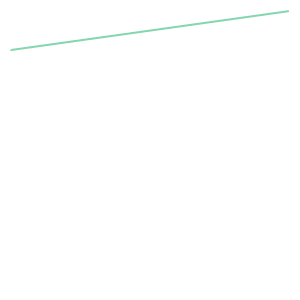

In [537]:
LineString(list(group_test["geometry"]))


In [538]:
#userid:46410906 has only one point i.e stationary
# there are some entries/ users with less than one point insurficient for a line 

In [539]:
group_test2 = grouped_by_users.get_group(16301)
type(group_test2)

geopandas.geodataframe.GeoDataFrame

In [540]:
import shapely
from shapely import speedups
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon
import fiona
group_test2["geometry"]

30512    POINT (939011.113 7254636.121)
30535    POINT (942231.630 7254606.868)
30545    POINT (943105.509 7252951.967)
30770    POINT (938934.725 7255785.084)
38232    POINT (992154.406 7249364.820)
38235    POINT (963714.440 7227653.688)
38909    POINT (993899.447 7214756.138)
38911    POINT (967158.903 7228720.775)
38913    POINT (995551.997 7212420.402)
Name: geometry, dtype: geometry

In [541]:
type(group_test2["geometry"])

geopandas.geoseries.GeoSeries

In [543]:
# we can apply len() to a geoseries. will be use to filter groups later on

In [544]:
len(group_test2["geometry"])

9

In [393]:
#userid:16301 moved a number of points

In [546]:
print(list(group_test2["geometry"]))

[<shapely.geometry.point.Point object at 0x00000201B9599BD0>, <shapely.geometry.point.Point object at 0x00000201B959A020>, <shapely.geometry.point.Point object at 0x00000201B959A200>, <shapely.geometry.point.Point object at 0x00000201B958CC70>, <shapely.geometry.point.Point object at 0x00000201B94E0910>, <shapely.geometry.point.Point object at 0x00000201B94E09A0>, <shapely.geometry.point.Point object at 0x00000201B94CC880>, <shapely.geometry.point.Point object at 0x00000201B94CC8E0>, <shapely.geometry.point.Point object at 0x00000201B94CC940>]


In [547]:
grouped_by_users["geometry"]

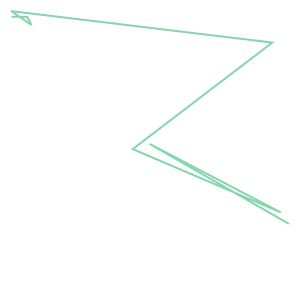

In [548]:
LineString(list(group_test2["geometry"]))

In [549]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the number of groups:
assert len(grouped_by_users.groups) == kruger_points["userid"].nunique(), "Number of groups should match number of unique users!"

### c) Create `shapely.geometry.LineString` objects for each user connecting the points from oldest to most recent

There are multiple ways to solve this problem (see the [hints for this exercise](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-2/exercise-2.html). You can use, for instance, a dictionary or an empty GeoDataFrame to collect data that is generated using the steps below:

- Use a for-loop to iterate over the grouped object. For each user’s data: 
    - [sort](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) the rows by timestamp 
    - create a `shapely.geometry.LineString` based on the user’s points

**CAREFUL**: Remember that every LineString needs at least two points. Skip users who have less than two posts.

Store the results in a `geopandas.GeoDataFrame` called `movements`, and remember to assign a CRS.

In [566]:
# ADD YOUR OWN CODE HERE 
# lets create an empty gepdataframe, movements
import shapely
from shapely import speedups
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon
import fiona
import pandas
import numpy as np
import geopandas 
# create an empty dict movements_df
movements_df = {
    "geometry": []
}
for key, group in grouped_by_users:
    #print(type(group["geometry"]))
    #print(list(group["geometry"]))
    #print(LineString(list(group["geometry"])))
    #print(key)
    group = group.sort_values(by = ["timestamp"])
    # create a geoseries of each group
    group = group["geometry"]
    if len(group)>= 2:
        new_group = LineString(list(group))
        movements_df["geometry"].append(new_group)
    else:
        
        del(group)
    
    
    
    
    
    


    
  

    
    
    
 

In [567]:
print(type(movements_df))

<class 'dict'>


In [568]:
#print(movements_df)


In [569]:
# convert our dict to a geopandas dataframe

In [570]:
movements = geopandas.GeoDataFrame(movements_df)

In [571]:


movenments = movements.set_crs(32735, allow_override=True)

In [572]:
movements.crs is None

True

In [573]:
#movements = movements.set_crs('epsg:32735')

In [574]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the result
print(type(movements))
print(movements.crs)

movements

<class 'geopandas.geodataframe.GeoDataFrame'>
None


,geometry
0,"LINESTRING (942231.630 7254606.868, 938934.725..."
1,"LINESTRING (905394.500 7193375.148, 905394.500..."
2,"LINESTRING (944551.607 7253384.183, 963788.403..."
3,"LINESTRING (902800.817 7192546.975, 902800.839..."
4,"LINESTRING (959332.961 7219877.715, 963788.403..."
...,...
9021,"LINESTRING (902885.190 7196931.096, 904027.710..."
9022,"LINESTRING (963782.211 7228000.079, 963754.402..."
9023,"LINESTRING (938876.653 7305143.369, 938876.943..."
9024,"LINESTRING (935937.029 7305973.536, 936598.681..."


### d) Calculate the distance between all posts of a user

- Check once more that the CRS of the data frame is correct
- Compute the lengths of the lines, and store it in a new column called `distance`

In [575]:
# ADD YOUR OWN CODE HERE
movements.crs

In [576]:
movements["distance"] = movements.length

In [577]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

#Check the output
movements.head()

,geometry,distance
0,"LINESTRING (942231.630 7254606.868, 938934.725...",328455.115430
1,"LINESTRING (905394.500 7193375.148, 905394.500...",0.000000
2,"LINESTRING (944551.607 7253384.183, 963788.403...",159189.081019
3,"LINESTRING (902800.817 7192546.975, 902800.839...",0.080245
4,"LINESTRING (959332.961 7219877.715, 963788.403...",9277.252211


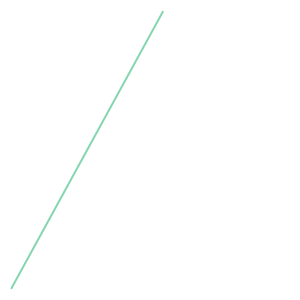

In [584]:
# we can begin to check a plot of linestring by each users below
# we can also confirm the distance travel by movements["geometry"][3].length
movements["geometry"][4]

In [585]:
type(movements["distance"])

pandas.core.series.Series

### e) Answer the original questions

You should now be able to quickly find answers to the following questions: 
- What was the shortest distance a user travelled between all their posts (in meters)? (store the value in a variable `shortest_distance`)
- What was the mean distance travelled per user (in meters)? (store the value in a variable `mean_distance`)
- What was the maximum distance a user travelled (in meters)? (store the value in a variable `longest_distance`)

In [586]:
# ADD YOUR OWN CODE HERE
movements["distance"].describe()

count    9.026000e+03
mean     1.071335e+05
std      3.194203e+05
min      0.000000e+00
25%      3.442262e+02
50%      1.529151e+04
75%      8.255276e+04
max      6.970669e+06
Name: distance, dtype: float64

In [587]:
shortest_distance = 0.000000e+00
mean_dsitance = 1.071335e+05
longest_distance = 6.970669e+06

### f) Save the movements in a file

Save the `movements` into a new Shapefile called `movements.shp` inside the `data` directory.

In [588]:
# ADD YOUR OWN CODE HERE
movements.to_file(DATA_DIRECTORY/"movements.shp")

In [589]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

assert (DATA_DIRECTORY / "movements.shp").exists()


---

# Fantastic job!

That’s all for this week! 